## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = 'outer', on= "Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
combined_df['Mouse ID'].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df['Timepoint'].value_counts()


0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates()
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_df["Mouse ID"].count()
num_mice

1892

## Summary Statistics

In [10]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_regimen_df = regimen_df.mean()
median_regimen_df = regimen_df.median()
variance_regimen_df = regimen_df.var()
stdev_regimen_df = regimen_df.std()
sem_regimen_df = regimen_df.sem()


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_stats_table = pd.DataFrame({"Mean": mean_regimen_df, 
                                   "Median": median_regimen_df,
                                   "Variance": variance_regimen_df,
                                   "Standard Deviation": stdev_regimen_df,
                                   "SEM": sem_regimen_df})
                    
summary_stats_table.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

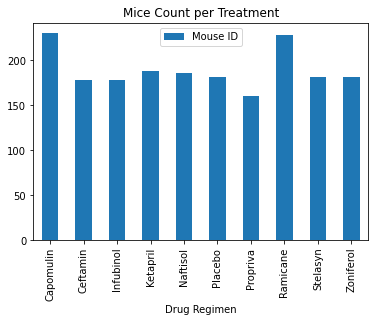

In [131]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_group = cleaned_df.groupby('Drug Regimen')['Mouse ID'].size()
regimen_df = pd.DataFrame(regimen_group)
regimen_df.plot(kind='bar', title = "Mice Count per Treatment")
regimen_df.set_xlabel= 'Drug Regimen'
regimen_df.set_ylabel= 'Mice Count'

In [143]:
#regimen_df

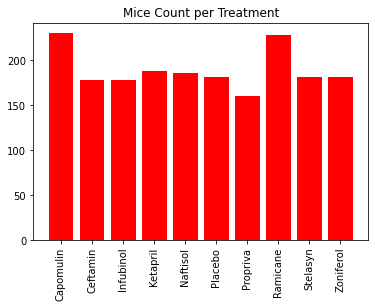

In [152]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_group = cleaned_df.groupby('Drug Regimen')['Mouse ID'].size()
regimen_df = pd.DataFrame(new_group)
    
x_axis = np.arange(len(regimen_df))
ticks = [value for value in x_axis]

plt.bar(x_axis, regimen_df['Mouse ID'], color = "r")
plt.xticks(ticks, regimen_df.index.values, rotation="vertical")

plt.title("Mice Count per Treatment")

plt.show()

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = cleaned_df.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender_group)
gender_df

,Mouse ID
Sex,
Female,934
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C7108EE0>],
      dtype=object)

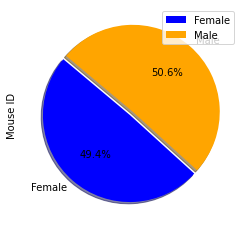

In [161]:
colors = ["blue", "orange"]
explode = (0, 0.05)

gender_df.plot(kind='pie', explode=explode, labels=gender_df.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=True)

<ipython-input-174-53b2ade79d87>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_df, explode=explode, labels=gender_df.index.values, colors=colors,


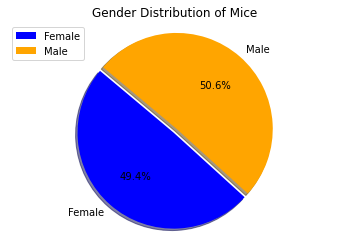

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"]
explode = (0, 0.05)

plt.pie(gender_df, explode=explode, labels=gender_df.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Gender Distribution of Mice")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [238]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")]
ram_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Ramicane")]
inf_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Infubinol")]
cef_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Ceftamin")]

cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [297]:
# Start by getting the last (greatest) timepoint for each mouse
cap_max_time_values = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_max_time_df = pd.DataFrame(cap_max_time_values)

ram_max_time_values = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_max_time_df=pd.DataFrame(ram_max_time_values)

inf_max_time_values = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_max_time_df=pd.DataFrame(inf_max_time_values)

cef_max_time_values = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_max_time_df=pd.DataFrame(cef_max_time_values)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cap_combo_df = pd.merge(cap_max_time_df,cleaned_df,on=("Mouse ID","Timepoint"),how="left")

ram_combo_df = pd.merge(ram_max_time_df,cleaned_df,on=("Mouse ID","Timepoint"),how="left")

inf_combo_df = pd.merge(inf_max_time_df,cleaned_df,on=("Mouse ID","Timepoint"),how="left")

cef_combo_df = pd.merge(cef_max_time_df,cleaned_df,on=("Mouse ID","Timepoint"),how="left")
cef_combo_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [286]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_array = cleaned_df['Drug Regimen'].unique()
treatment_list = list(treatment_array)
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_list = []
ram_tumor_list = []
inf_tumor_list = []
cef_tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Capomulin
quartiles = cap_combo_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


# Ramicane
quartiles = ram_combo_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


# Infubinol
quartiles = inf_combo_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


# Ceftamin
quartiles = cef_combo_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [301]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

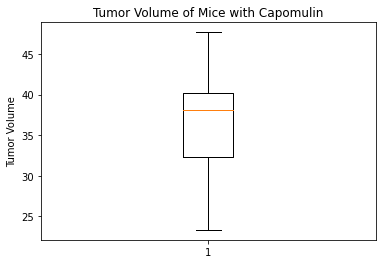

In [292]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = cap_combo_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice with Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

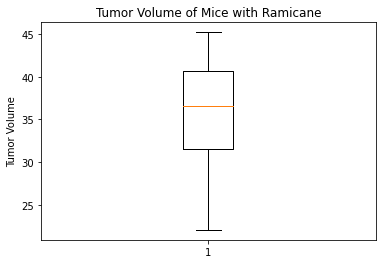

In [291]:
Tumor_Volume = ram_combo_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice with Ramicane')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

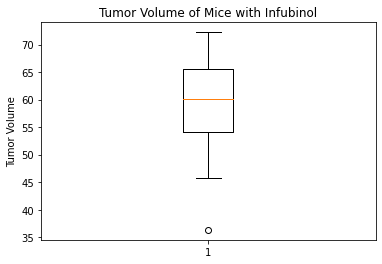

In [289]:
Tumor_Volume = inf_combo_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice with Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

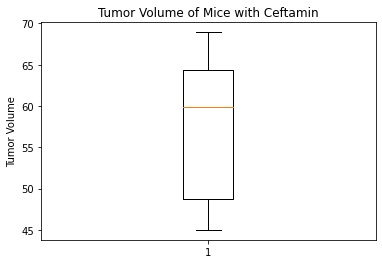

In [290]:
Tumor_Volume = cef_combo_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice with Ceftamin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

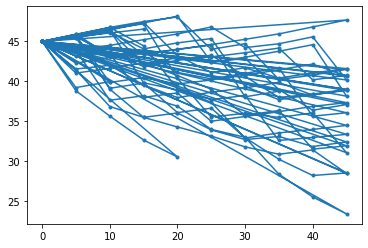

In [313]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint = cap_df["Timepoint"]
volume = cap_df["Tumor Volume (mm3)"]

plt.plot(timepoint, volume, marker = '.')

plt.xlabel('Time point')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume for Mice with Capomulin')
plt.show()

In [306]:
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


TypeError: 'str' object is not callable

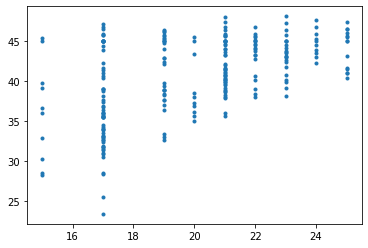

In [317]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = cap_df["Weight (g)"]
volume = cap_df["Tumor Volume (mm3)"]

plt.scatter(weight, volume, marker = '.')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Mice Weight versus Tumor Volume')
plt.show()

## Correlation and Regression

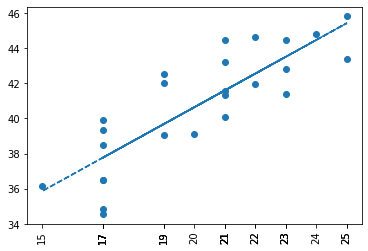

In [332]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

#nneed x and y value for both df

avg_weight = cap_df.groupby(cap_df["Mouse ID"])["Weight (g)"].mean()

avg_volume = cap_df.groupby(cap_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p, std_err = st.linregress(avg_weight, avg_volume)

fit = slope * avg_weight + int

plt.scatter(avg_weight,avg_volume)
#plt.xlabel("Weight of Mouse")
#plt.ylabel("Tumor Volume")
plt.plot(avg_weight,fit,"--")
plt.xticks(avg_weight, rotation=90)
plt.show()


In [334]:
corr = round(st.pearsonr(avg_weight,avg_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

The correlation between weight and tumor value is 0.84
